# Buisness Understanding

- we have to design that have to predict at how much chance will the person will get into the admission

In [181]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data set


In [182]:

df = pd.read_csv('admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Understanding

In [183]:
# lets rename the some columns
df.columns = ['Serial No.',
 'GRE_Score',
 'TOEFL_Score',
 'University_Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance_of_Admit']

In [184]:
df.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [185]:
df['Research'] = df['Research'].replace({1:'yes',0:'no'})

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    object 
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 35.3+ KB


In [187]:
df.shape

(500, 9)

In [188]:
df.size

4500

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE_Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [190]:
# drop the serial num  column

In [191]:
df = df.iloc[:,1:]

In [192]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,yes,0.92
1,324,107,4,4.0,4.5,8.87,yes,0.76
2,316,104,3,3.0,3.5,8.00,yes,0.72
3,322,110,3,3.5,2.5,8.67,yes,0.80
4,314,103,2,2.0,3.0,8.21,no,0.65


In [193]:
# since we have no categorical so we would have also less eda

In [194]:
continous = [i for i in df.columns if df[i].dtypes != 'O']
continous

['GRE_Score',
 'TOEFL_Score',
 'University_Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Chance_of_Admit']

In [195]:
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [196]:
df.duplicated().sum()

0

# Exaploratory Data Analysis

<Axes: >

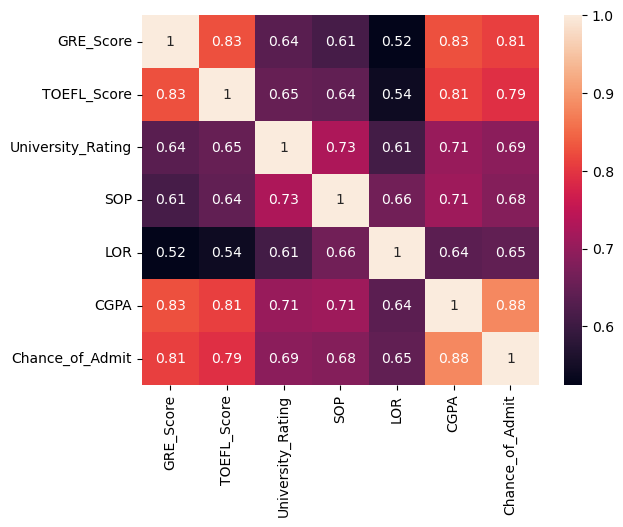

In [197]:
sns.heatmap(df[continous].corr(),annot = True)

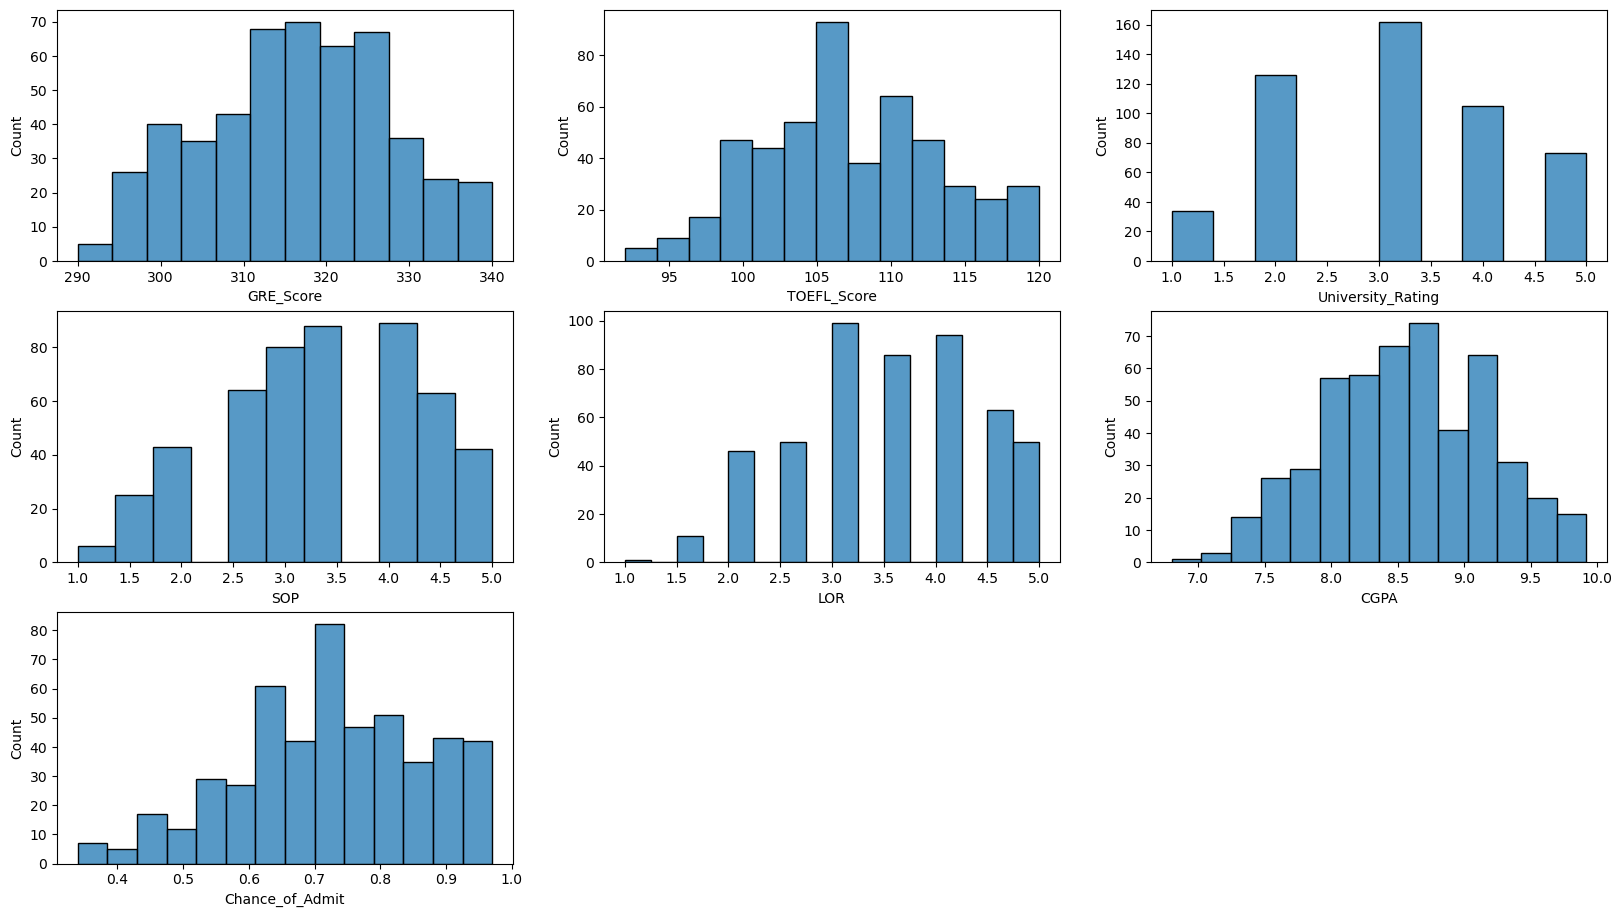

In [198]:
plt.figure(figsize = (20,15))

m = 1
for i in continous:
    plt.subplot(4,3,m)
    sns.histplot(df[i]) 
    m += 1

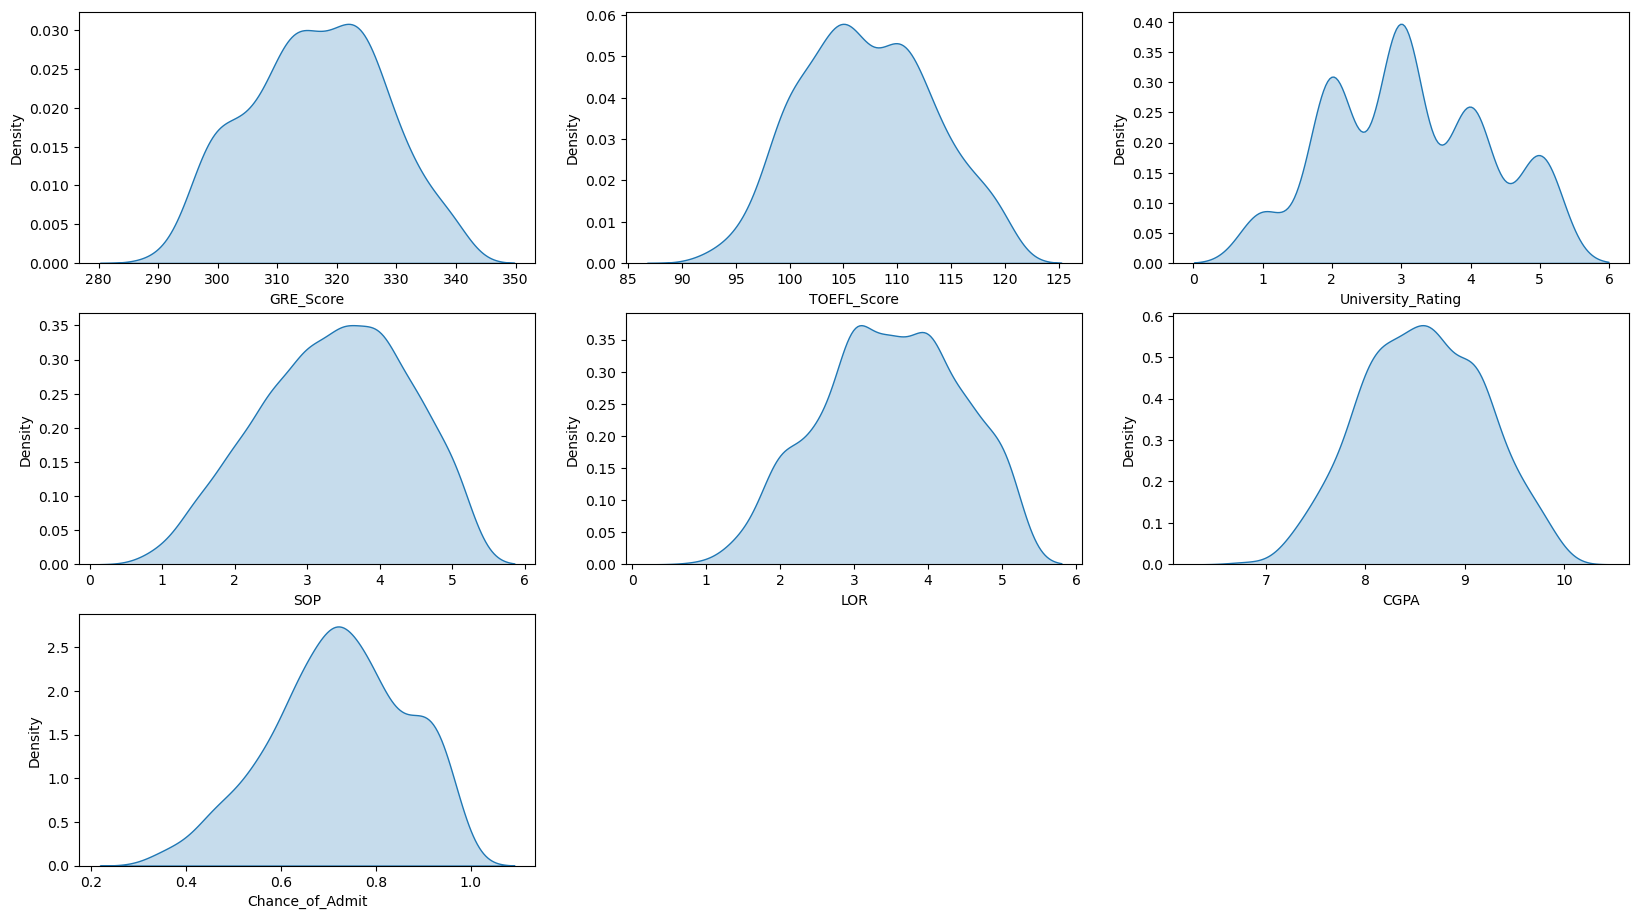

In [199]:
plt.figure(figsize = (20,15))

m = 1
for i in continous:
    plt.subplot(4,3,m)
    sns.kdeplot(df[i],fill = True) 
    m += 1

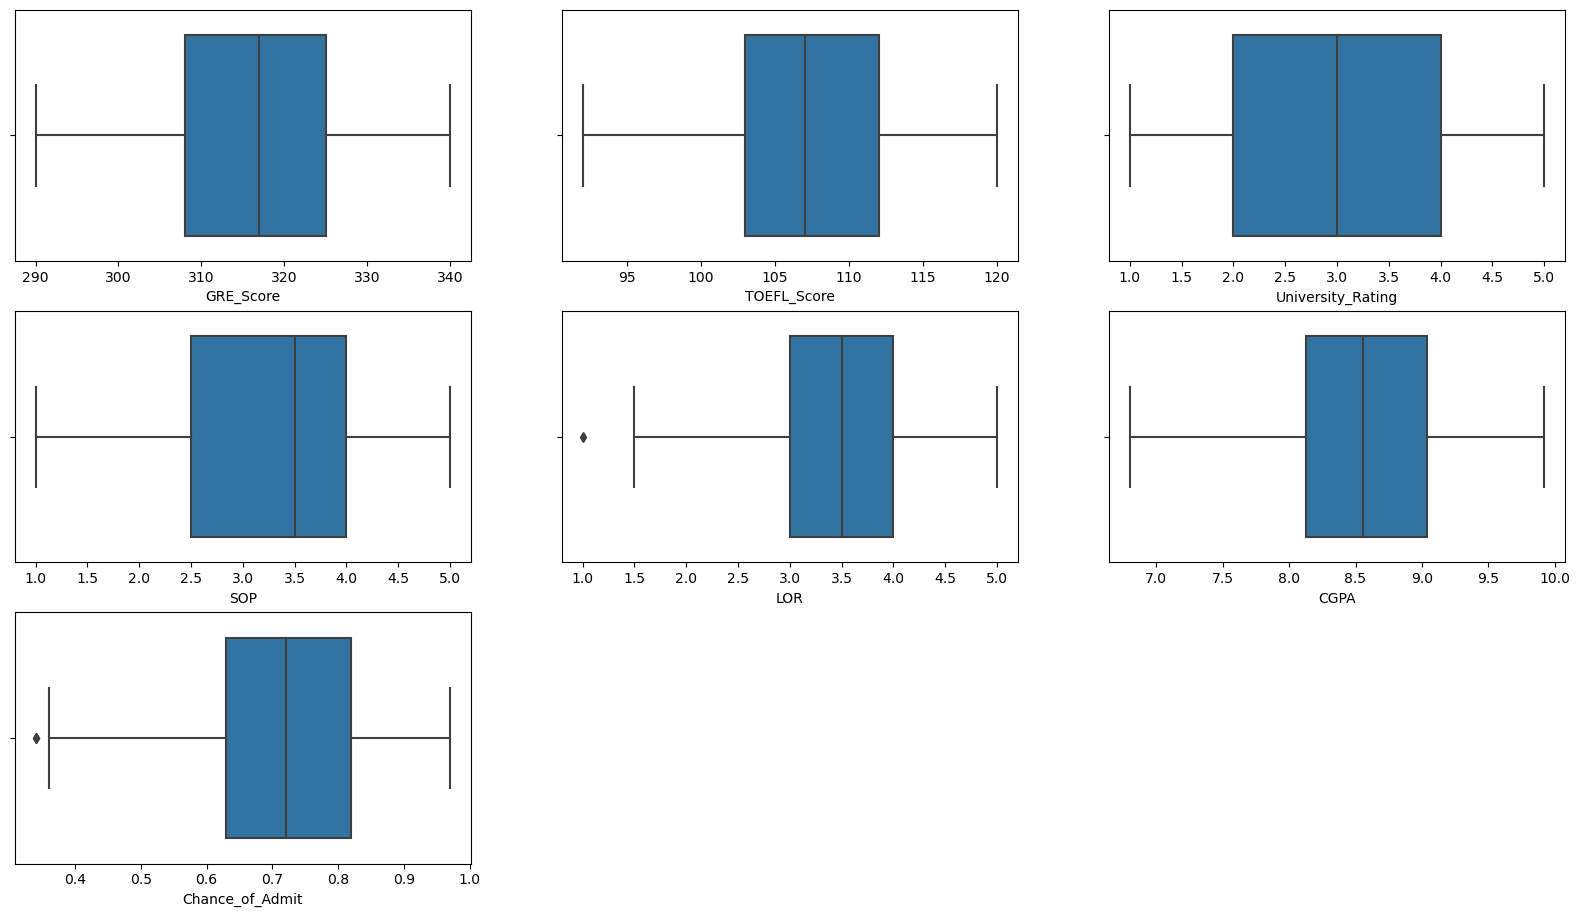

In [200]:
plt.figure(figsize = (20,15))

m = 1
for i in continous:
    plt.subplot(4,3,m)
    sns.boxplot(x = df[i]) 
    m += 1

In [201]:
df[continous].skew()

GRE_Score           -0.039842
TOEFL_Score          0.095601
University_Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Chance_of_Admit     -0.289966
dtype: float64

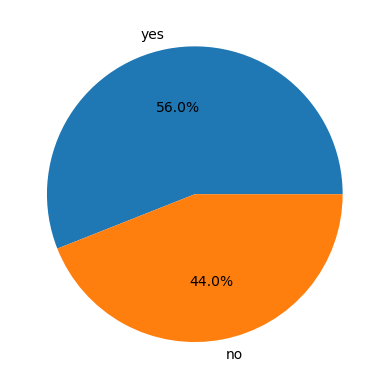

In [202]:
plt.pie(df['Research'].value_counts(),labels = df['Research'].value_counts().index.to_list(),autopct = '%0.1f%%')
plt.show()

# Data Preparation

In [203]:
# encoding

In [204]:
df['Research'] = df['Research'].replace({'yes':1,'no':0})

In [205]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [206]:
#df['total'] = (df['GRE_Score']+df['TOEFL_Score'])/2

In [207]:
X = df.drop(['Chance_of_Admit'],axis = 1)
y = df['Chance_of_Admit']

# Train_test SpIit

In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 8)

# Modelling

### LinearRegression

In [209]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

from sklearn.metrics import r2_score
print('train_accuracy:',r2_score(y_train,ypred_train))
print('test_accuracy:',r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('cv:',cross_val_score(lr,X_train,y_train,cv = 5).mean())

train_accuracy: 0.8293590251003071
test_accuracy: 0.7858508184037285
cv: 0.8224787960345953


In [211]:
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


### Non_LinearRegression

In [212]:
from sklearn.preprocessing import PolynomialFeatures
pc = PolynomialFeatures(degree = 2,include_bias = False)
X_train_poly = pd.DataFrame(pc.fit_transform(X_train))
X_test_poly = pd.DataFrame(pc.transform(X_test))

nlr = LinearRegression()
nlr.fit(X_train_poly,y_train)

ypred_train = nlr.predict(X_train_poly)
ypred_test = nlr.predict(X_test_poly)

from sklearn.metrics import r2_score
print('train_accuracy:',r2_score(y_train,ypred_train))
print('test_accuracy:',r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('cv:',cross_val_score(nlr,X_train_poly,y_train,cv = 5).mean())

train_accuracy: 0.8479088160154525
test_accuracy: 0.7741948328146131
cv: 0.8156689602178684


# Lasso

In [213]:
# hypertuning

from sklearn.linear_model import Lasso
estimator = Lasso()

param_grid = {'alpha':list(range(1,55))}

from sklearn.model_selection import GridSearchCV
grid_lasso = GridSearchCV(estimator,param_grid,cv = 5, scoring = 'r2')
grid_lasso.fit(X_train,y_train)
grid_lasso.best_params_

{'alpha': 1}

In [214]:
model = Lasso(alpha = 1)
model.fit(X_train,y_train)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

from sklearn.metrics import r2_score
print('train_accuracy:',r2_score(y_train,ypred_train))
print('test_accuracy:',r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('cv:',cross_val_score(model,X_train,y_train,cv = 5).mean())

train_accuracy: 0.2787258058654749
test_accuracy: 0.2796429766888512
cv: 0.2718617305946814


# Ridge

In [215]:
# hypertuning

from sklearn.linear_model import Ridge
estimator = Ridge()

param_grid = {'alpha':list(range(1,55))}

from sklearn.model_selection import GridSearchCV
grid_ridge = GridSearchCV(estimator,param_grid,cv = 5, scoring = 'r2')
grid_ridge.fit(X_train,y_train)
grid_ridge.best_params_

{'alpha': 1}

In [216]:
m_r = Ridge(alpha = 1)
m_r.fit(X_train,y_train)

ypred_train = m_r.predict(X_train)
ypred_test = m_r.predict(X_test)

from sklearn.metrics import r2_score
print('train_accuracy:',r2_score(y_train,ypred_train))
print('test_accuracy:',r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('cv:',cross_val_score(m_r,X_train,y_train,cv = 5).mean())

train_accuracy: 0.8293053385938982
test_accuracy: 0.7859973483286552
cv: 0.8224263993668448


# ElasticNet

In [217]:
# hypertuning

from sklearn.linear_model import ElasticNet
estimator = ElasticNet()

param_grid = {'alpha':list(range(1,55)),'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

from sklearn.model_selection import GridSearchCV
grid_en = GridSearchCV(estimator,param_grid,cv = 5, scoring = 'r2')
grid_en.fit(X_train,y_train)
grid_en.best_params_

{'alpha': 1, 'l1_ratio': 0.1}

In [221]:
m_el = ElasticNet(alpha = 1,l1_ratio = 0.1)
m_el.fit(X_train,y_train)

ypred_train = m_el.predict(X_train)
ypred_test = m_el.predict(X_test)

from sklearn.metrics import r2_score
print('train_accuracy:',r2_score(y_train,ypred_train))
print('test_accuracy:',r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('cv:',cross_val_score(m_el,X_train,y_train,cv = 5).mean())

train_accuracy: 0.7022606041226336
test_accuracy: 0.6338851785635227
cv: 0.699440886076531


In [222]:
# out of all these Multiple Linear Regression gave the best